#### Link to the explanation video: https://drive.google.com/file/d/1DshaJSt9rerj9ACb_hs4YvrC2VfbVDsE/view?usp=sharing

## Q1

### Q1.a + Q1.b

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./diabetes.csv', sep='\t')

In [3]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
df.shape

(442, 11)

### Q1.c

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
deciles_y_values = df['Y'].quantile(np.arange(0, 1, 0.1))
deciles_y_values

0.0     25.0
0.1     60.0
0.2     77.0
0.3     94.0
0.4    115.0
0.5    140.5
0.6    168.0
0.7    196.7
0.8    232.0
0.9    265.0
Name: Y, dtype: float64

In [7]:
df.loc[0, 'Y'], np.searchsorted(deciles_y_values, df.loc[0, 'Y'])

(151, 6)

In [8]:
# setting the decile number for each sample according to its Y feature value
df['Class'] = np.searchsorted(deciles_y_values, df['Y']) - 1

In [9]:
np.sort(df['Class'].value_counts())

array([ 1, 42, 43, 43, 44, 44, 44, 45, 45, 45, 46])

### Q1.e

#### Visualize the data

In [10]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,Class
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,5
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,1
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,5
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,7
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,4


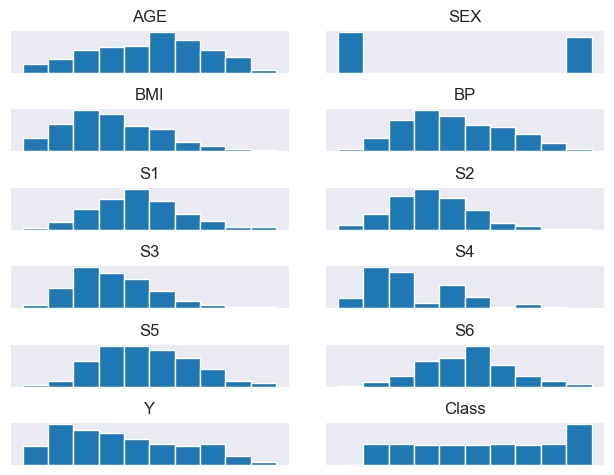

In [11]:
fig, axes = plt.subplots(len(df.columns) // 2, 2)
fig.tight_layout(pad=0.67)

for idx, col in enumerate(df.columns):
    axes[idx // 2, idx % 2].hist(df[col])
    axes[idx // 2, idx % 2].set_title(col)
    axes[idx // 2, idx % 2].axes.get_xaxis().set_visible(False)
    axes[idx // 2, idx % 2].axes.get_yaxis().set_visible(False)


#### Normalizing values

In [12]:
def normalize(values):
    mean = values.mean()
    std = values.std()
    return (values - mean) / std

In [13]:
to_normalize = True
if to_normalize:
    df['AGE'] = normalize(df['AGE'])
    df['BMI'] = normalize(df['BMI'])
    df['BP'] = normalize(df['BP'])
    df['S1'] = normalize(df['S1'])
    df['S2'] = normalize(df['S2'])
    df['S3'] = normalize(df['S3'])
    df['S4'] = normalize(df['S4'])
    df['S5'] = normalize(df['S5'])
    df['S6'] = normalize(df['S6'])
    df['Y'] = normalize(df['Y'])
    df['SEX'] = df['SEX'].apply(lambda value: value - 1)

In [14]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,Class
0,0.799594,1,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569,-0.014703,5
1,-0.039522,0,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285,-1.000525,1
2,1.791277,1,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537,-0.144416,5
3,-1.870322,0,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600,0.698721,7
4,0.113044,0,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458,-0.222244,4


In [15]:
# percentage of positive values in each feature column after normalizing
# we can deduce that we'll need to work with negative values in the training process, so using the ReLU activation function is a less preferred option
for col in df.columns:
    print(f'{col} - {np.count_nonzero(df[col].value_counts() > 0) / len(df)}')

AGE - 0.13122171945701358
SEX - 0.004524886877828055
BMI - 0.36877828054298645
BP - 0.22624434389140272
S1 - 0.3190045248868778
S2 - 0.6832579185520362
S3 - 0.1425339366515837
S4 - 0.1493212669683258
S5 - 0.416289592760181
S6 - 0.12669683257918551
Y - 0.4841628959276018
Class - 0.024886877828054297


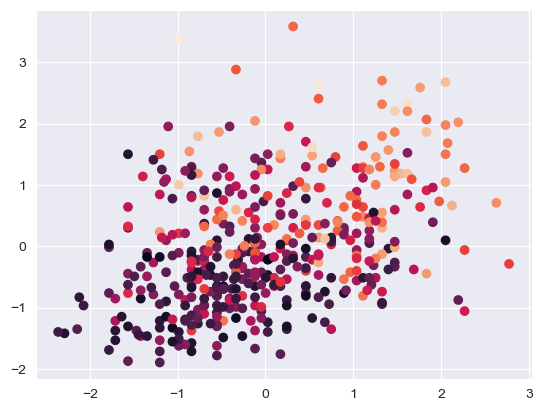

In [16]:
plt.scatter(df['BP'], df['BMI'], c=df['Y'])

In [17]:
def scatter_plot(df, x_col, y_col, class_col, ax=plt, font_size=4):
    ax.scatter(df[x_col], df[y_col], c=df[class_col])
    ax.set_xlabel(x_col, size=font_size, fontweight='bold')
    ax.set_ylabel(y_col, size=font_size, fontweight='bold')

In [18]:
def scatter_subplots(df, x_cols, y_cols, class_cols, size):
    n = len(x_cols)
    fig, axes = plt.subplots(n // 2, 2, figsize=(size, size))
    for i in range(n):
        scatter_plot(df, x_cols[i], y_cols[i], class_cols[i], axes[i // 2, i % 2], font_size=size)
    fig.tight_layout()

In [19]:
x_cols = ['AGE', 'AGE', 'BP', 'BP', 'AGE', 'BP']
y_cols = ['BP', 'S1', 'S1', 'S2', 'S2', 'S3']
class_cols = ['Y', 'Y', 'Y', 'Class', 'Y', 'Y']

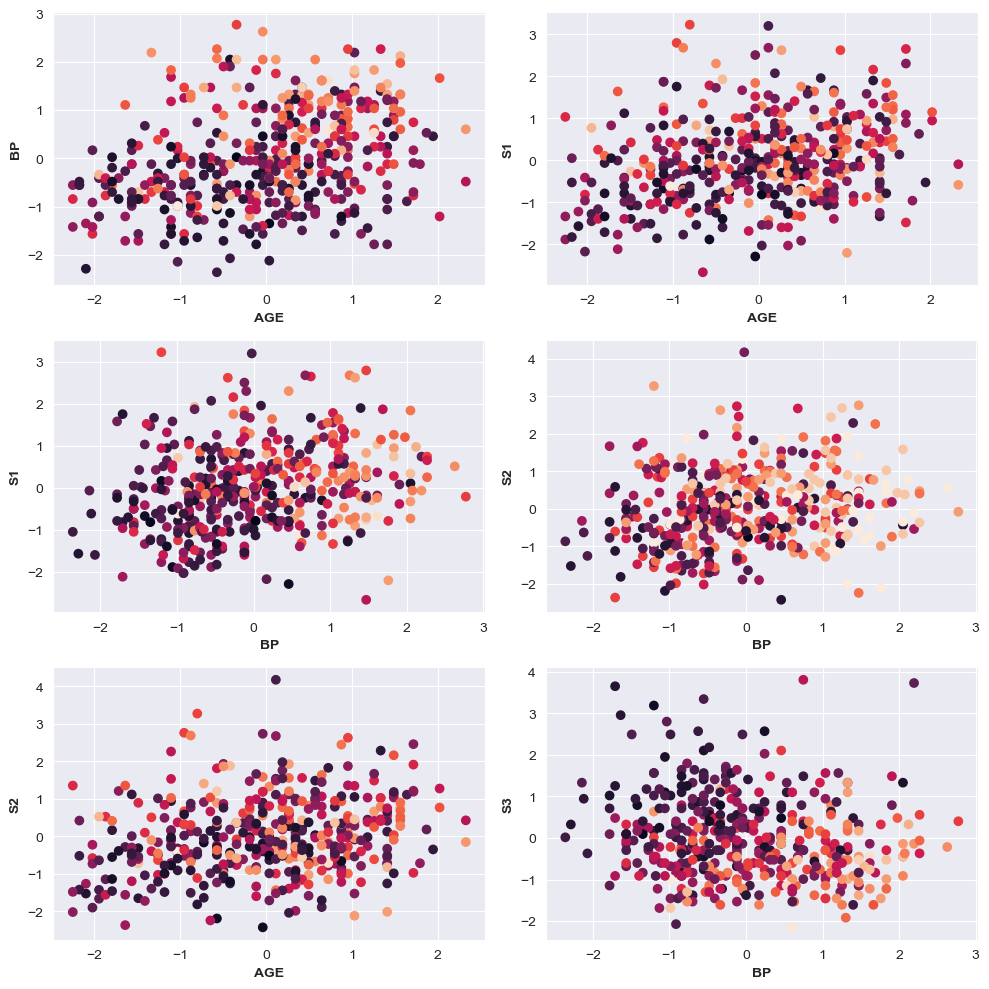

In [20]:
scatter_subplots(df, x_cols, y_cols, class_cols, 10)

In [21]:
x_cols = ['AGE' for i in range(len(df.columns))]
y_cols = df.columns
class_cols = ['Y' for i in range(len(df.columns))]

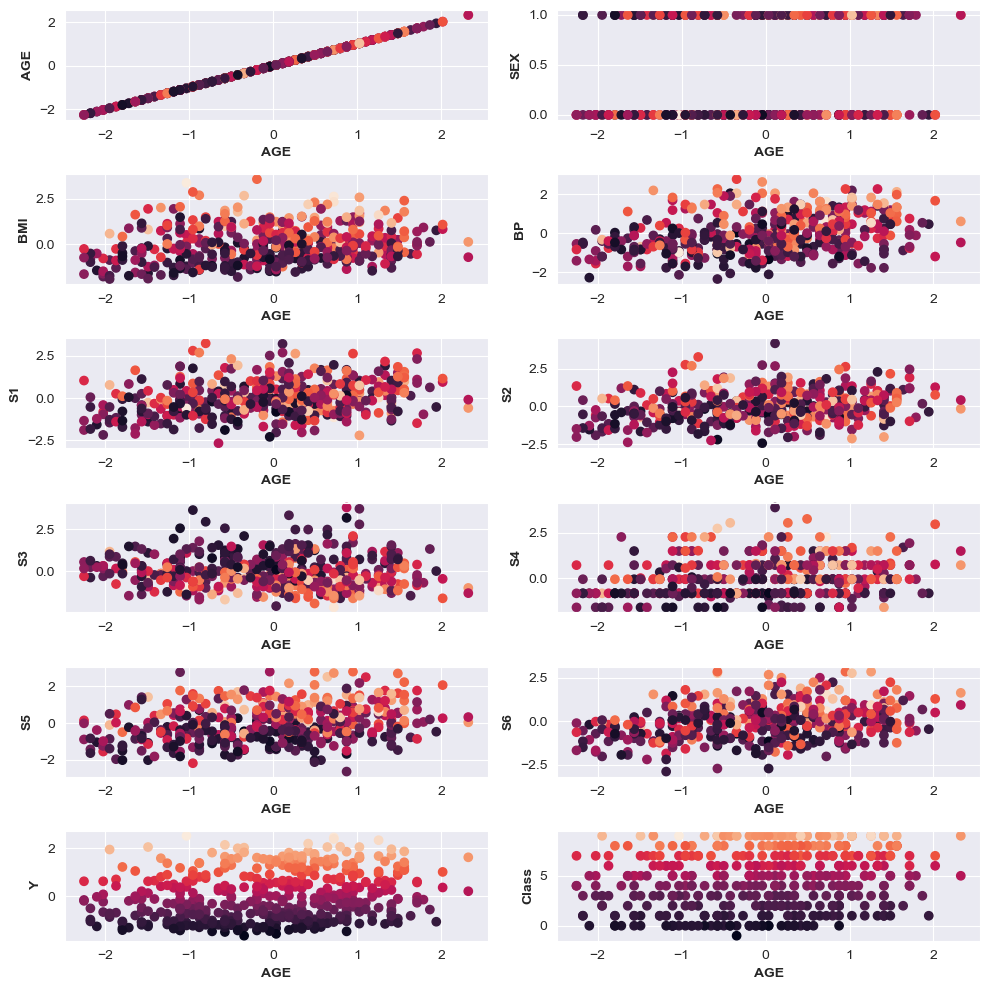

In [22]:
scatter_subplots(df, x_cols, y_cols, class_cols, 10)

In [23]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [24]:
class DiabetesDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file_path,
                 is_y_target=False,
                 include_y_as_feature=False,
                 convert_from_numpy=True,
                 quantile_interval=0.1,
                 transform=None,
                 target_transform=None):
        df = pd.read_csv(csv_file_path, sep='\t')
        df['AGE'] = normalize(df['AGE'])
        df['BMI'] = normalize(df['BMI'])
        df['BP'] = normalize(df['BP'])
        df['S1'] = normalize(df['S1'])
        df['S2'] = normalize(df['S2'])
        df['S3'] = normalize(df['S3'])
        df['S4'] = normalize(df['S4'])
        df['S5'] = normalize(df['S5'])
        df['S6'] = normalize(df['S6'])
        df['Y'] = normalize(df['Y'])
        df['SEX'] = df['SEX'].apply(lambda value: value - 1)
        deciles_y_values = df['Y'].quantile(np.arange(0, 1, quantile_interval))
        df['Class'] = np.searchsorted(deciles_y_values, df['Y'])
        # if we want to predict the Y column
        predict_class = 'Y' if is_y_target else 'Class'
        to_drop_features = [predict_class, 'Y'] if not include_y_as_feature else [predict_class]
        # used in the regression model
        if is_y_target:
            to_drop_features.append('Class')
        # getting relevant data in numpy format
        self.X = df.drop(to_drop_features, axis=1).to_numpy()
        self.Y = df[predict_class].to_numpy()
        # converting to pytorch tensors
        if convert_from_numpy:
            self.X = torch.from_numpy(self.X).to(torch.float32)
            self.Y = torch.from_numpy(self.Y).to(torch.float32) if is_y_target else torch.from_numpy(self.Y).to(torch.long) 
            
        self.samples = self.X
        self.labels = self.Y

        # transformers
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx, :], self.labels[idx]

### Q1.f

In [25]:
diabetes_dataset_for_class = DiabetesDataset(csv_file_path='./diabetes.csv',
                                             include_y_as_feature=True)
dataloader_for_class = torch.utils.data.DataLoader(diabetes_dataset_for_class, batch_size=10, shuffle=True)

#### Q1.g

In [26]:
enumerator = enumerate(dataloader_for_class)

In [27]:
for batch_idx, (sample, label) in enumerator:
    print(sample, label)
    break

tensor([[-0.3447,  0.0000, -0.2209,  0.0255, -0.7842, -0.7510,  0.2483, -0.8294,
         -0.4493, -0.7185, -1.6491],
        [-1.2601,  1.0000,  0.3224, -0.4083,  0.7761,  1.0114,  0.4029, -0.0544,
         -0.6457, -0.0226, -0.7281],
        [ 0.8759,  1.0000, -0.3340,  0.3632, -0.7842, -0.2906, -0.5248, -0.2327,
         -0.9845,  0.3253, -0.2612],
        [ 0.7233,  1.0000, -0.6283,  0.0978,  1.9608,  1.8269,  0.7122, -0.0544,
          0.5052, -0.8055, -1.0784],
        [ 1.2573,  1.0000,  0.8656,  0.2424,  0.8628,  1.4849, -0.7568,  0.7205,
         -0.2290, -0.6315,  0.5950],
        [-0.1158,  1.0000, -0.8772, -0.9144, -1.6800, -1.5993, -0.6795, -0.8294,
          0.2148, -0.1966,  0.3355],
        [ 0.6470,  1.0000,  1.2504,  1.1823, -0.4664,  0.0250, -0.6795, -0.0544,
         -0.5207, -0.3706,  1.4381],
        [-0.4972,  0.0000, -0.9678, -0.6975,  0.6894,  0.7615,  0.7895, -0.0544,
         -0.6982,  0.2383, -1.0394],
        [-1.5652,  0.0000, -0.2209, -0.1191, -1.3910, -1

#### Helper Functions for next sections

In [28]:
import torch.nn as nn

In [29]:
def create_metrics_tensors(dataloader, epochs, per_epoch=False):
    num_batches = len(dataloader)
    losses = torch.zeros(epochs if per_epoch else epochs * num_batches)
    accuracies = torch.zeros(epochs if per_epoch else epochs * num_batches)
    return losses, accuracies

In [30]:
def plot_metrics(losses_arg, accuracies_arg):
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(accuracies_arg)
    ax.set_title('Accuracy')
    ax = fig.add_subplot(2, 1, 2)
    ax.plot(losses_arg)
    ax.set_title('Loss')
    fig.tight_layout()

In [31]:
def train(model, loss, optimizer, losses, accuracies, dataloader, plot=True, plot_per_epoch=False):
    num_batches = len(dataloader)
    epochs_ = len(losses) // num_batches if not plot_per_epoch else len(losses)
    for epoch in range(epochs_):
        for batch_idx, (batch, batch_labels) in enumerate(dataloader):
            # zero the gradient
            optimizer.zero_grad()
            # forward propagate batch data
            batch_output = model(batch)
            # calculate loss
            batch_loss = loss(batch_output, batch_labels)
            # calculate batch gradient
            batch_loss.backward()
            # update weights with the batch's gradient
            optimizer.step()
            
            if not plot_per_epoch:
                with torch.no_grad():
                    predictions = batch_output.argmax(dim=1)
                    batch_accuracy = (predictions == batch_labels).sum() / len(batch_labels)
                    accuracies[epoch * num_batches + batch_idx] = batch_accuracy
                    losses[epoch * num_batches + batch_idx] = batch_loss
        if plot_per_epoch:
            with torch.no_grad():
                predictions = model(dataloader.dataset.samples).argmax(dim=1)
                accuracy = (predictions == dataloader.dataset.labels).sum() / len(dataloader.dataset.labels)
                accuracies[epoch] = accuracy
                losses[epoch] = loss(predictions.to(torch.float32), dataloader.dataset.labels.to(torch.float32))
    if plot:
        plot_metrics(losses, accuracies)

In [32]:
epochs = 50

 #### Q1.h - Predicting Class (all features)

In [33]:
model = nn.Sequential(
    nn.Linear(diabetes_dataset_for_class.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, len(diabetes_dataset_for_class.labels.unique())),
    nn.LogSoftmax(dim=1)
)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
losses, accuracies = create_metrics_tensors(dataloader_for_class, epochs, per_epoch=True)

In [34]:
model

Sequential(
  (0): Linear(in_features=11, out_features=8, bias=True)
  (1): LogSigmoid()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Tanhshrink()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): LogSigmoid()
  (6): Linear(in_features=8, out_features=8, bias=True)
  (7): Tanhshrink()
  (8): Linear(in_features=8, out_features=11, bias=True)
  (9): LogSoftmax(dim=1)
)

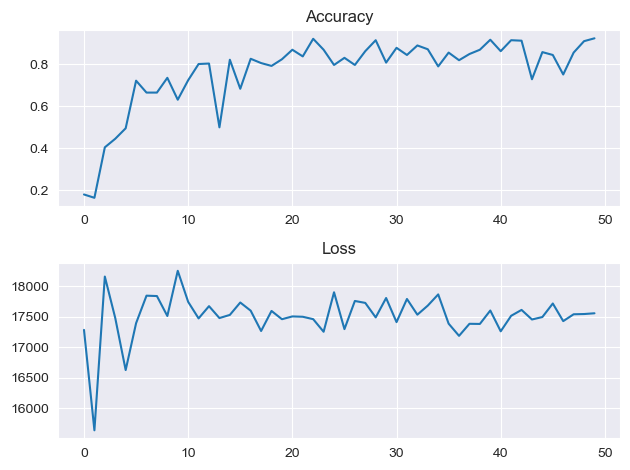

In [35]:
train(model, loss, optimizer, losses, accuracies, dataloader_for_class, plot_per_epoch=True)

#### Q1.i - Predicting Class (W/O Y)

In [36]:
diabetes_dataset_for_class_wo_y = DiabetesDataset(csv_file_path='./diabetes.csv',
                                                  include_y_as_feature=False)
dataloader_for_class_wo_y = torch.utils.data.DataLoader(diabetes_dataset_for_class_wo_y, batch_size=10, shuffle=True)

In [37]:
model = nn.Sequential(
    nn.Linear(diabetes_dataset_for_class_wo_y.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, len(diabetes_dataset_for_class_wo_y.labels.unique())),
    nn.LogSoftmax(dim=1)
)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
losses, accuracies = create_metrics_tensors(dataloader_for_class_wo_y, epochs, per_epoch=True)

In [38]:
model

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): LogSigmoid()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Tanhshrink()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): LogSigmoid()
  (6): Linear(in_features=8, out_features=8, bias=True)
  (7): Tanhshrink()
  (8): Linear(in_features=8, out_features=11, bias=True)
  (9): LogSoftmax(dim=1)
)

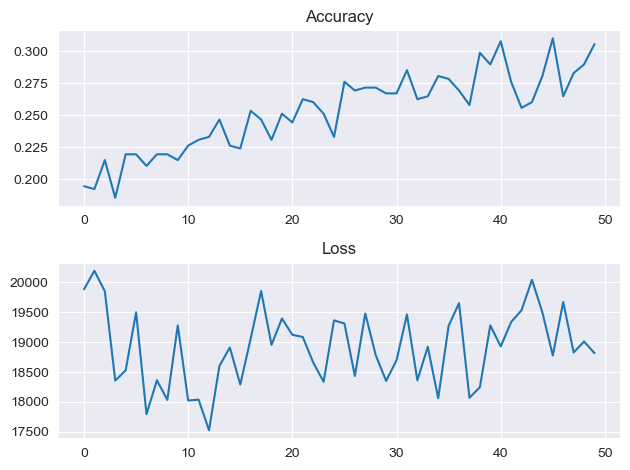

In [39]:
train(model, loss, optimizer, losses, accuracies, dataloader_for_class_wo_y, plot_per_epoch=True)

#### Q1.j

In [40]:
# Creating a dataset class for supporting train & test set
class DiabetesTrainDataset(DiabetesDataset):
    def __init__(self, csv_file_path, test_size, is_y_target=False, include_y_as_feature=True, quantile_interval=0.1):
        # initializing X, Y to be used with train_test_split
        super().__init__(csv_file_path,
                         is_y_target=is_y_target,
                         include_y_as_feature=include_y_as_feature,
                         convert_from_numpy=False,
                         quantile_interval=quantile_interval,
                         transform=None,
                         target_transform=None)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,
                                                                                self.Y,
                                                                                test_size=test_size,
                                                                                shuffle=True)
        
        self.X_train = torch.from_numpy(self.X_train).to(torch.float32)
        self.y_train = torch.from_numpy(self.y_train).to(torch.long)
        self.samples = self.X_train
        self.labels = self.y_train

    def __len__(self):
        return len(self.X_train)

    def __getitem__(self, idx):
        return self.X_train[idx, :], self.y_train[idx]

In [41]:
class DiabetesTestDataset(torch.utils.data.Dataset):
    # using the train dataset to have a truly separated data
    def __init__(self, train_dataset):
        self.X_test, self.y_test = train_dataset.X_test, train_dataset.y_test
        self.X_test = torch.from_numpy(self.X_test).to(torch.float32)
        self.y_test = torch.from_numpy(self.y_test).to(torch.long)
        self.samples = self.X_test
        self.labels = self.y_test

    def __len__(self):
        return len(self.X_test)

    def __getitem__(self, idx):
        return self.X_test[idx, :], self.y_test[idx]

##### All Features model

In [42]:
diabetes_train_dataset_all_features = DiabetesTrainDataset('./diabetes.csv', test_size=0.2, include_y_as_feature=True)
diabetes_test_dataset_all_features = DiabetesTestDataset(diabetes_train_dataset_all_features)

In [43]:
diabetes_train_dataloader_all_features = torch.utils.data.DataLoader(diabetes_train_dataset_all_features, batch_size=10, shuffle=True)
diabetes_test_dataloader_all_features = torch.utils.data.DataLoader(diabetes_test_dataset_all_features, batch_size=10, shuffle=True)

In [44]:
model_all_features = nn.Sequential(
    nn.Linear(diabetes_train_dataset_all_features.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 11),
    nn.LogSoftmax(dim=1)
)
loss_all_features = nn.CrossEntropyLoss()
optimizer_all_features = torch.optim.Adam(model_all_features.parameters(), lr=1e-2)
losses_all_features, accuracies_all_features = create_metrics_tensors(diabetes_train_dataloader_all_features, epochs, per_epoch=True)

In [45]:
model_all_features

Sequential(
  (0): Linear(in_features=11, out_features=8, bias=True)
  (1): LogSigmoid()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Tanhshrink()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): LogSigmoid()
  (6): Linear(in_features=8, out_features=8, bias=True)
  (7): Tanhshrink()
  (8): Linear(in_features=8, out_features=11, bias=True)
  (9): LogSoftmax(dim=1)
)

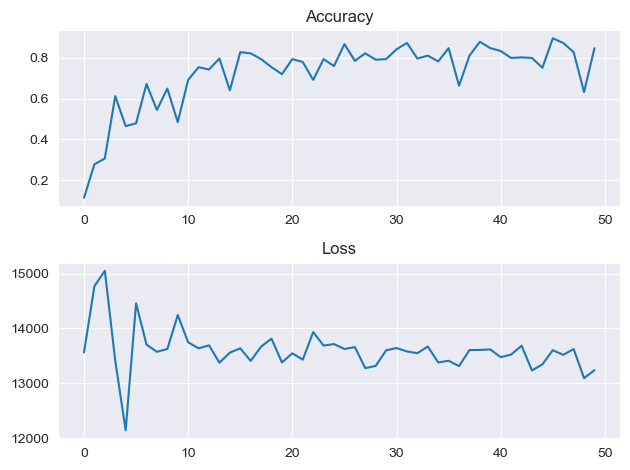

In [46]:
train(model_all_features, loss_all_features, optimizer_all_features, losses_all_features, accuracies_all_features, diabetes_train_dataloader_all_features, plot=True, plot_per_epoch=True)

In [47]:
import seaborn as sns

In [48]:
def test(model, dataloader, num_classes, plot=False):
    accuracy = 0
    # creating the confusion matrix
    confusion_matrix = torch.zeros((num_classes, num_classes))
    with torch.no_grad():
        # traversing the test data in batches
        for batch_idx, (batch, batch_labels) in enumerate(dataloader):
            # predicting the current batch and updating the accuracy and confusion matrix
            predictions = model(batch).argmax(dim=1)
            accuracy += (predictions == batch_labels).sum()
            for i in range(len(batch)):
                label_idx = batch_labels[i] - 1
                preds_idx = predictions[i] - 1
                confusion_matrix[label_idx, preds_idx] += 1

    if plot:
        accuracy = accuracy / (len(dataloader) * dataloader.batch_size)
        sns.heatmap(confusion_matrix, annot=True, fmt='.4g')
        plt.ylabel('Label')
        plt.xlabel('Prediction')
        plt.title(f'Confusion Matrix - Accuracy: {accuracy}')

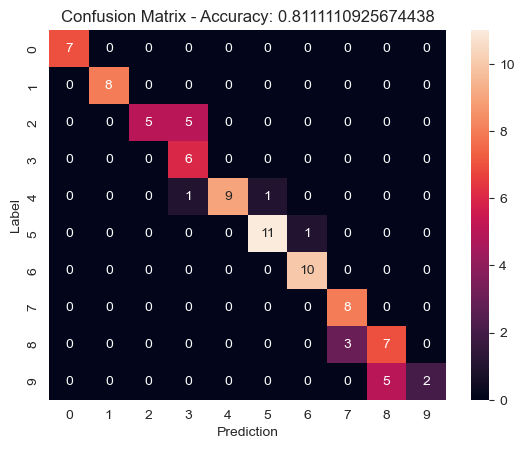

In [49]:
test(model_all_features, diabetes_test_dataloader_all_features, 10, plot=True)

##### All features (W/O Y) model

In [50]:
diabetes_train_dataset_wo_y = DiabetesTrainDataset('./diabetes.csv', test_size=0.2, include_y_as_feature=False)
diabetes_test_dataset_wo_y = DiabetesTestDataset(diabetes_train_dataset_wo_y)

In [51]:
diabetes_train_dataloader_wo_y = torch.utils.data.DataLoader(diabetes_train_dataset_wo_y, batch_size=10, shuffle=True)
diabetes_test_dataloader_wo_y = torch.utils.data.DataLoader(diabetes_test_dataset_wo_y, batch_size=10, shuffle=True)

In [52]:
model_wo_y = nn.Sequential(
    nn.Linear(diabetes_train_dataset_wo_y.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 11),
    nn.LogSoftmax(dim=1)
)
loss_wo_y = nn.CrossEntropyLoss()
optimizer_wo_y = torch.optim.Adam(model_wo_y.parameters(), lr=1e-2)
losses_wo_y, accuracies_wo_y = create_metrics_tensors(diabetes_train_dataloader_wo_y, epochs, per_epoch=True)

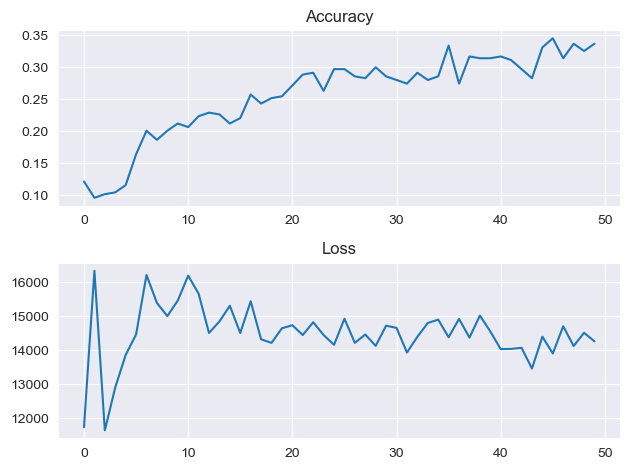

In [53]:
train(model_wo_y, loss_wo_y, optimizer_wo_y, losses_wo_y, accuracies_wo_y, diabetes_train_dataloader_wo_y, plot=True, plot_per_epoch=True)

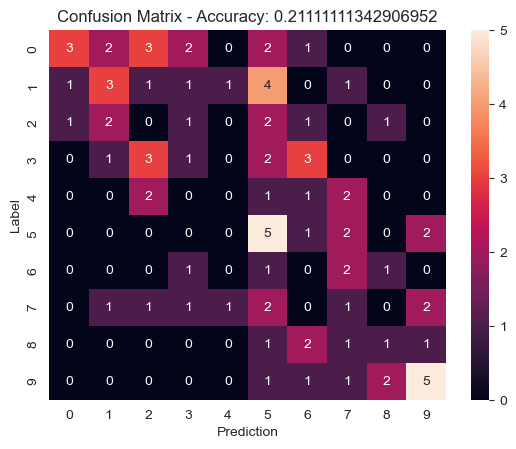

In [54]:
test(model_wo_y, diabetes_test_dataloader_wo_y, 10, plot=True)

#### Q1.k

##### The model that used all features got the better results and that due to the fact that the label values we're trying to predict are defined as a simple function of the one feature we used, meaning that the Class column is a function of the Y column, as we defined in early sections.
##### Given a simple relationship between the features and the predicted class, the network was able the refer that pretty good.
##### On the other hand, without using the Y feature, the second model had a harder time, and that due to the fact that the Y values in the original dataset weren't related in a simpler fashion to the feature values as in between Y and Class. Furthermore, the dataset is very small so the network couldn't generalize the training data very good. 
##### From the confusion matrices we can see that using all the features, the predictions were very focused, where each incorrect prediction had a deviation of at most 1 decile where without the Y feature the confusion matrix is much more sparse and indecisive.

#### Q1.l

##### All features model

In [55]:
diabetes_dataset_for_class_100_quantiles = DiabetesDataset('./diabetes.csv',
                                                           include_y_as_feature=True,
                                                           quantile_interval=0.01)
diabetes_dataloader_for_class_100_quantiles = torch.utils.data.DataLoader(diabetes_dataset_for_class_100_quantiles, batch_size=10, shuffle=True) 

In [56]:
model_100_quantiles_all_features = nn.Sequential(
    nn.Linear(diabetes_dataset_for_class_100_quantiles.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 101),
    nn.LogSoftmax(dim=1)
)
loss_100_quantiles_all_features = nn.CrossEntropyLoss()
optimizer_100_quantiles_all_features = torch.optim.Adam(model_100_quantiles_all_features.parameters(), lr=1e-2)
losses_100_quantiles_all_features, accuracies_100_quantiles_all_features = create_metrics_tensors(diabetes_dataloader_for_class_100_quantiles, epochs, per_epoch=True)

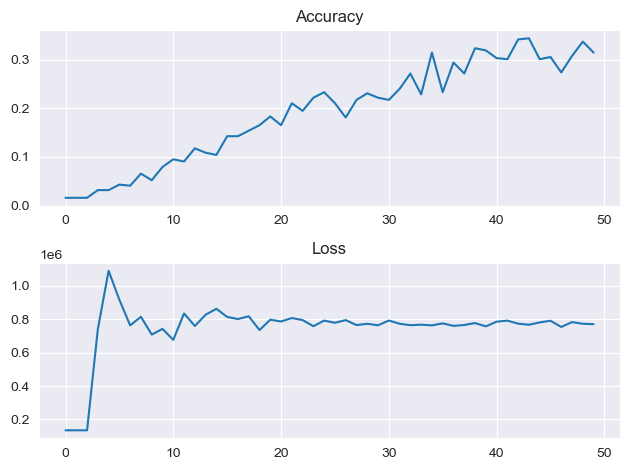

In [57]:
train(model_100_quantiles_all_features,
      loss_100_quantiles_all_features,
      optimizer_100_quantiles_all_features,
      losses_100_quantiles_all_features,
      accuracies_100_quantiles_all_features,
      diabetes_dataloader_for_class_100_quantiles,
      plot=True,
      plot_per_epoch=True)

##### All features (W/O Y) model

In [58]:
diabetes_dataset_for_class_100_quantiles_wo_y = DiabetesDataset('./diabetes.csv',
                                                           include_y_as_feature=False,
                                                           quantile_interval=0.01)
diabetes_dataloader_for_class_100_quantiles_wo_y = torch.utils.data.DataLoader(diabetes_dataset_for_class_100_quantiles_wo_y, batch_size=10, shuffle=True) 

In [59]:
model_100_quantiles_wo_y = nn.Sequential(
    nn.Linear(diabetes_dataset_for_class_100_quantiles_wo_y.samples.shape[1], 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 8),
    nn.LogSigmoid(),
    nn.Linear(8, 8),
    nn.Tanhshrink(),
    nn.Linear(8, 101),
    nn.LogSoftmax(dim=1)
)
loss_100_quantiles_wo_y = nn.CrossEntropyLoss()
optimizer_100_quantiles_wo_y = torch.optim.Adam(model_100_quantiles_wo_y.parameters(), lr=1e-2)
losses_100_quantiles_wo_y, accuracies_100_quantiles_wo_y = create_metrics_tensors(diabetes_dataloader_for_class_100_quantiles_wo_y, epochs, per_epoch=True)

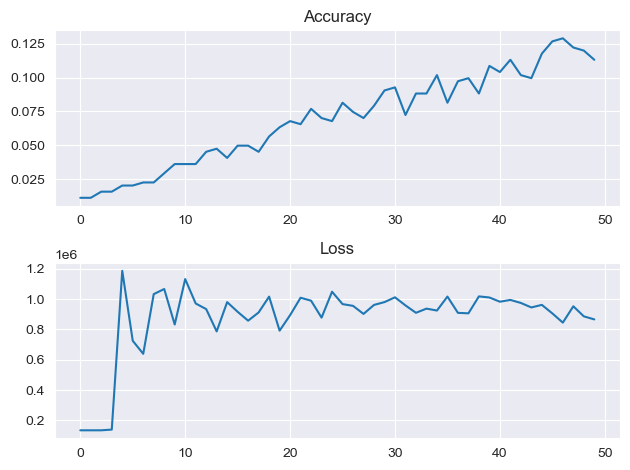

In [60]:
train(model_100_quantiles_wo_y,
      loss_100_quantiles_wo_y,
      optimizer_100_quantiles_wo_y,
      losses_100_quantiles_wo_y,
      accuracies_100_quantiles_wo_y,
      diabetes_dataloader_for_class_100_quantiles_wo_y,
      plot=True,
      plot_per_epoch=True)

##### Using the train & test datasets

###### All features data

In [61]:
diabetes_train_dataset_100_quantiles_all_features = DiabetesTrainDataset('./diabetes.csv', test_size=0.2, include_y_as_feature=True, quantile_interval=0.01)
diabetes_test_dataset_100_quantiles_all_features = DiabetesTestDataset(diabetes_train_dataset_100_quantiles_all_features)

In [62]:
diabetes_train_dataloader_100_quantiles_all_features = torch.utils.data.DataLoader(diabetes_train_dataset_100_quantiles_all_features,
                                                                                                          batch_size=10,
                                                                                                          shuffle=True)
diabetes_test_dataloader_100_quantiles_all_features = torch.utils.data.DataLoader(diabetes_test_dataset_100_quantiles_all_features,
                                                                                                         batch_size=10,
                                                                                                         shuffle=True)

###### W/O Y data

In [63]:
diabetes_train_dataset_100_quantiles_wo_y = DiabetesTrainDataset('./diabetes.csv', test_size=0.2, include_y_as_feature=False, quantile_interval=0.01)
diabetes_test_dataset_100_quantiles_wo_y = DiabetesTestDataset(diabetes_train_dataset_100_quantiles_wo_y)

In [64]:
diabetes_train_dataloader_100_quantiles_wo_y = torch.utils.data.DataLoader(diabetes_train_dataset_100_quantiles_wo_y,
                                                                                   batch_size=10,
                                                                                   shuffle=True)
diabetes_test_dataloader_100_quantiles_wo_y = torch.utils.data.DataLoader(diabetes_test_dataset_100_quantiles_wo_y,
                                                                                  batch_size=10,
                                                                                  shuffle=True)

###### Resetting the last 2 models to train on the training data

In [65]:
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

In [66]:
reset_model_parameters(model_100_quantiles_all_features)
reset_model_parameters(model_100_quantiles_wo_y)

###### Resetting the metrics tensors

In [67]:
# all features network and metrics parameters
loss_100_quantiles_all_features = nn.CrossEntropyLoss()
optimizer_100_quantiles_all_features = torch.optim.Adam(model_100_quantiles_all_features.parameters(), lr=1e-2)
losses_100_quantiles_all_features, accuracies_100_quantiles_all_features = create_metrics_tensors(diabetes_train_dataloader_100_quantiles_all_features,
                                                                                                  epochs,
                                                                                                  per_epoch=True)
# w/o y feature network and metrics parameters
loss_100_quantiles_wo_y = nn.CrossEntropyLoss()
optimizer_100_quantiles_wo_y = torch.optim.Adam(model_100_quantiles_wo_y.parameters(), lr=1e-2)
losses_100_quantiles_wo_y, accuracies_100_quantiles_wo_y = create_metrics_tensors(diabetes_train_dataloader_100_quantiles_all_features,
                                                                                  epochs,
                                                                                  per_epoch=True)

##### All features model

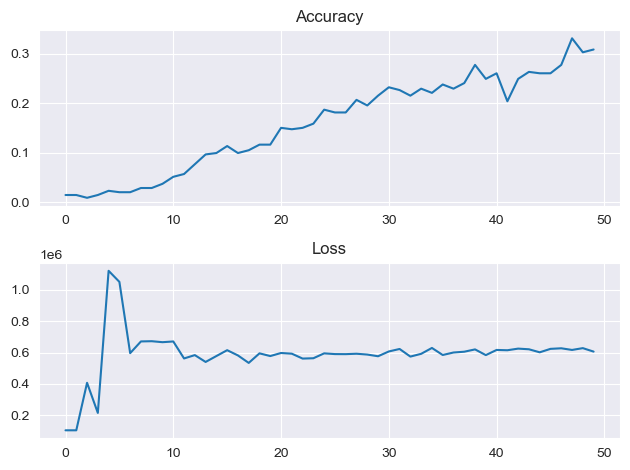

In [68]:
train(model_100_quantiles_all_features,
      loss_100_quantiles_all_features,
      optimizer_100_quantiles_all_features,
      losses_100_quantiles_all_features,
      accuracies_100_quantiles_all_features,
      diabetes_train_dataloader_100_quantiles_all_features,
      plot=True,
      plot_per_epoch=True)

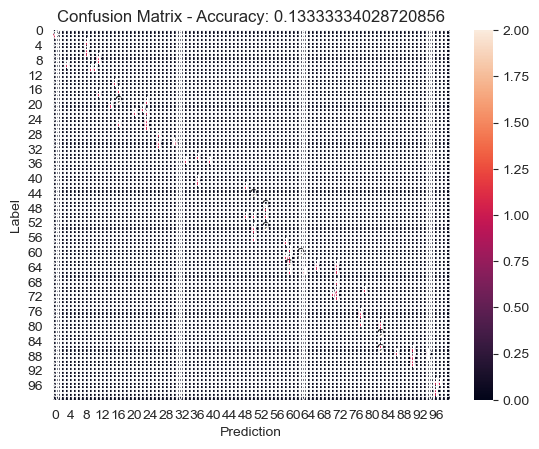

In [69]:
test(model_100_quantiles_all_features, diabetes_test_dataloader_100_quantiles_all_features, 100, plot=True)

##### All features (W/O Y) model

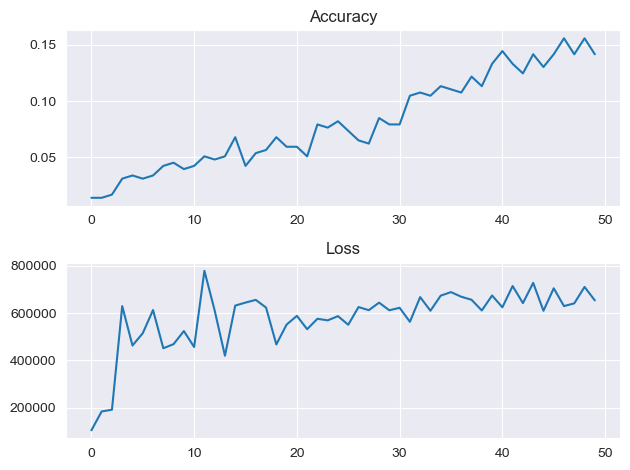

In [70]:
train(model_100_quantiles_wo_y,
      loss_100_quantiles_wo_y,
      optimizer_100_quantiles_wo_y,
      losses_100_quantiles_wo_y,
      accuracies_100_quantiles_wo_y,
      diabetes_train_dataloader_100_quantiles_wo_y,
      plot=True,
      plot_per_epoch=True)

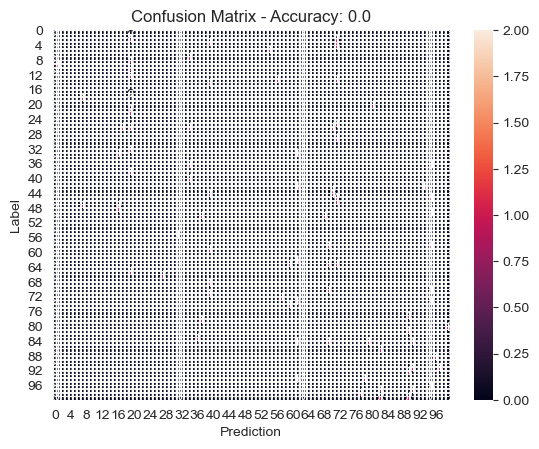

In [71]:
test(model_100_quantiles_wo_y, diabetes_test_dataloader_100_quantiles_wo_y, 100, plot=True)

#### Q1.m

##### According to the results and reason, we would want to use deciles and not percentiles as trying to predict a larger number of classes is a more challenging task than with a small number of classes. Furthermore, in more common scenarios, generalization for smaller number of classes is easier to execute as more samples can "fit" inside one class with smaller number of classes to predict than in larger ones.

##### Specifically speaking from results' perspective, our 2 respective models performed way worse using percentiles predictions as the "all-features" ones predicted ~10% test accuracy and the deciles one ~80% test accuracy, and the "w/o y" deciles model had ~15-20% test accuracy where the percentile one had ~1% test accuracy. Both deciles models had ~14K cross entropy loss value and the percentiles had ~600K. This leads us to the conclusion that using the same network architecture for both use cases (deciles/percentiles), we would prefer to use deciles.

#### Bonus

In [72]:
diabetes_regression_dataset = DiabetesDataset(csv_file_path='./diabetes.csv',
                                              is_y_target=True, 
                                              include_y_as_feature=False)
diabetes_regression_dataloader = torch.utils.data.DataLoader(diabetes_regression_dataset, batch_size=10, shuffle=True)

In [104]:
regression_model = nn.Sequential(
    nn.Linear(diabetes_regression_dataset.samples.shape[1], 16),
    nn.Tanh(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.Tanh(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
regression_loss = nn.SmoothL1Loss()
regression_optimizer = torch.optim.SGD(regression_model.parameters(), lr=1e-2)

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
def train_regression(r_model, r_loss, r_optimizer, r_dataloader, r_epochs=50):
    r_losses = torch.zeros(r_epochs)
    
    for epoch in range(r_epochs):
        for batch_idx, (batch, batch_labels) in enumerate(r_dataloader):
            # zero the gradient
            r_optimizer.zero_grad()
            # forward propagate batch data
            batch_output = r_model(batch)
            # calculate loss
            batch_loss = r_loss(batch_output, batch_labels)
            # calculate batch gradient
            batch_loss.backward()
            # update weights with the batch's gradient
            r_optimizer.step()
    
        with torch.no_grad():
            predictions = r_model(r_dataloader.dataset.samples)
            r_losses[epoch] = r_loss(predictions, r_dataloader.dataset.labels)
    
    plt.plot(r_losses)

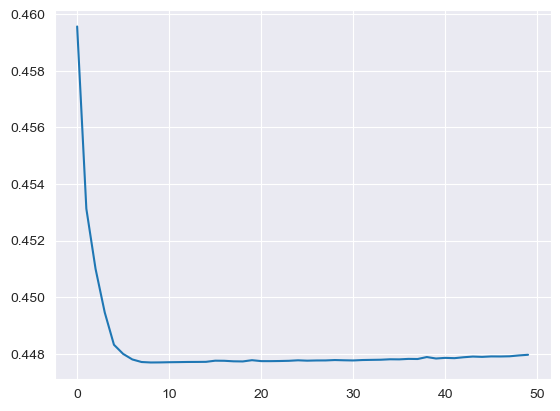

In [107]:
train_regression(regression_model, regression_loss, regression_optimizer, diabetes_regression_dataloader, 50)

In [108]:
diabetes_regression_train_dataset = DiabetesTrainDataset(csv_file_path='./diabetes.csv',
                                                         test_size=0.2,
                                                         is_y_target=True,
                                                         include_y_as_feature=False)
diabetes_regression_train_dataloader = torch.utils.data.DataLoader(diabetes_regression_train_dataset, batch_size=10, shuffle=True)

In [109]:
diabetes_regression_test_dataset = DiabetesTestDataset(diabetes_regression_train_dataset)
diabetes_regression_test_dataloader = torch.utils.data.DataLoader(diabetes_regression_test_dataset, batch_size=10, shuffle=True)

In [110]:
reset_model_parameters(regression_model)

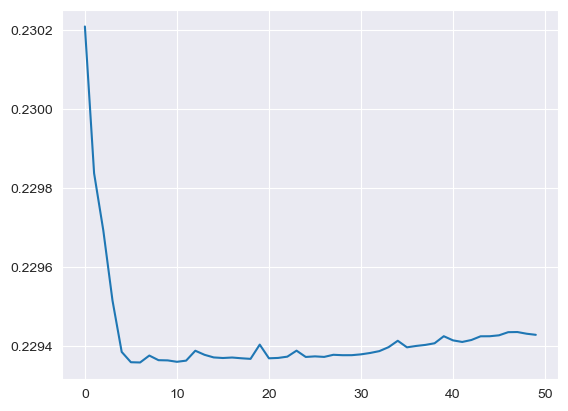

In [111]:
train_regression(regression_model, regression_loss, regression_optimizer, diabetes_regression_train_dataloader, 50)

In [112]:
def test_regression(r_model, r_loss, r_dataloader):
    with torch.no_grad():
        predictions = r_model(r_dataloader.dataset.samples)
        return r_loss(predictions, r_dataloader.dataset.labels).item(), predictions

In [113]:
test_loss, test_preds = test_regression(regression_model, regression_loss, diabetes_regression_test_dataloader)
test_loss

0.21981433033943176

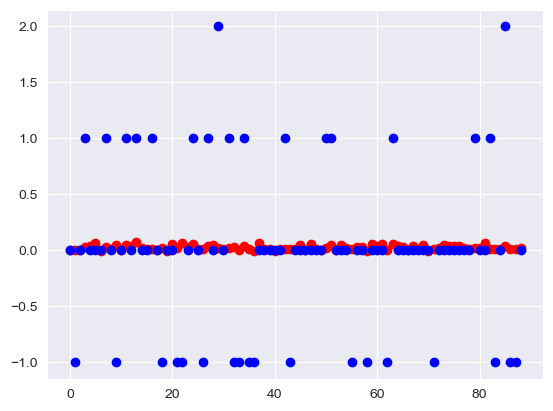

In [114]:
plt.scatter(torch.arange(len(test_preds)), test_preds, c='r')
plt.scatter(torch.arange(len(test_preds)), diabetes_regression_test_dataloader.dataset.labels,  c='b')